In [693]:
import librosa
audio_path = './music_data_set/Data/genres_original/pop/pop.00001.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
#<class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr)
#(396688,) 22050

<class 'numpy.ndarray'> <class 'int'>
(661504,) 22050


In [694]:
librosa.load(audio_path, sr=44100)

(array([0.70928496, 0.53207296, 0.28603703, ..., 0.23405789, 0.20898111,
        0.14433314], dtype=float32),
 44100)

In [695]:
librosa.load(audio_path, sr=None)

(array([0.7692261 , 0.2246399 , 0.69036865, ..., 0.21218872, 0.21685791,
        0.24371338], dtype=float32),
 22050)

In [696]:
import IPython.display as ipd
ipd.Audio(audio_path)

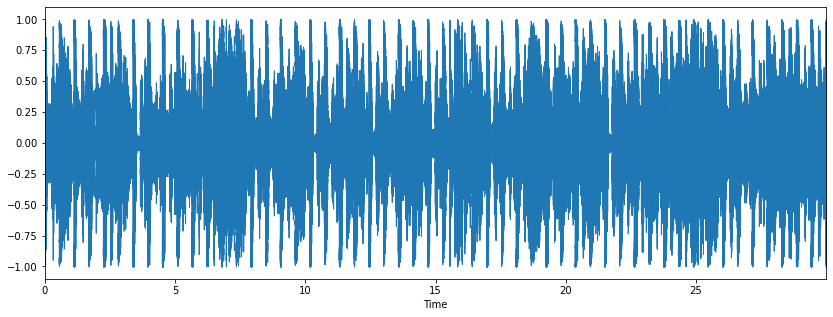

In [534]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

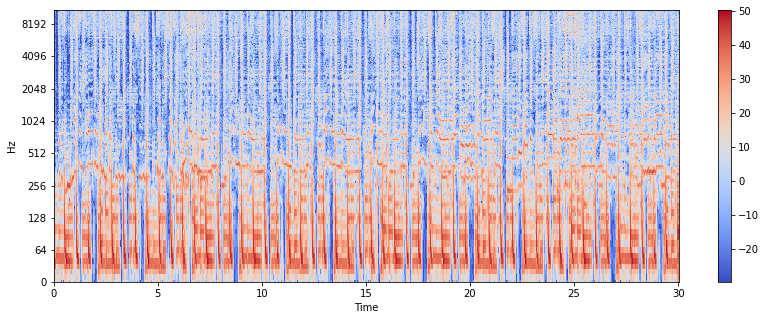

In [535]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

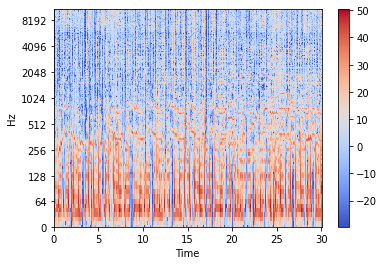

In [536]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [537]:
# import numpy as np
# sr = 22050 # sample rate
# T = 5.0    # seconds
# t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
# x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
# #Playing the audio
# ipd.Audio(x, rate=sr) # load a NumPy array
# #Saving the audio

In [538]:
print(librosa.__version__)

0.8.0


In [539]:
# import soundfile as sf

In [540]:
# data, samplerate = sf.read(audio_path)

In [541]:
# sf.write(x, data, samplerate)

In [542]:
#feature extraction
# Load the signal
x, sr = librosa.load(audio_path)


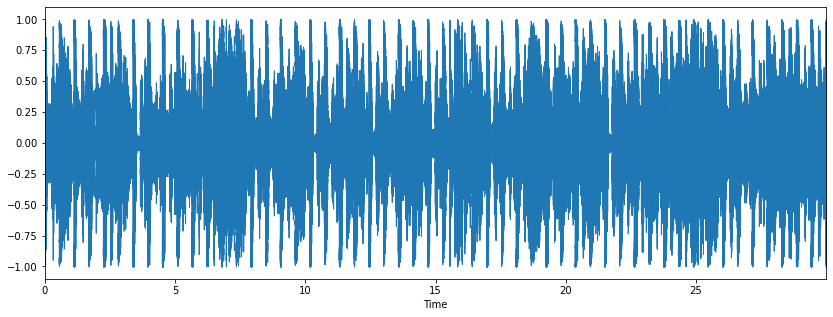

In [543]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

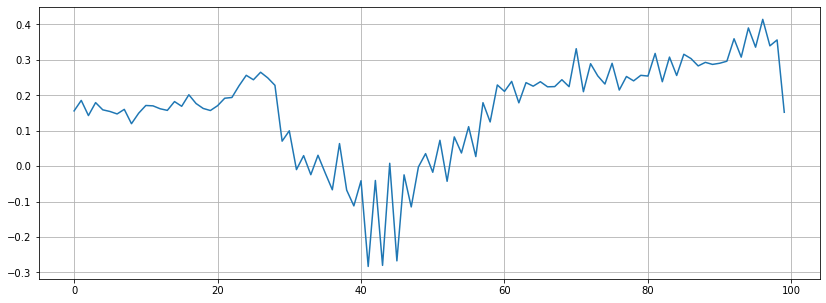

In [544]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [545]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

14


In [546]:
#spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape


(1293,)

In [547]:

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


In [548]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


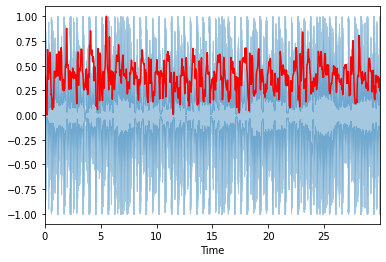

In [549]:
import sklearn

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

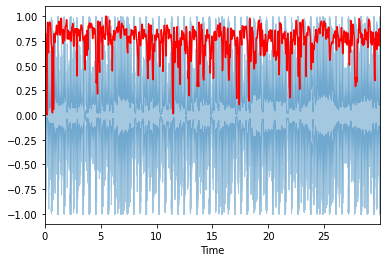

In [550]:
#spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

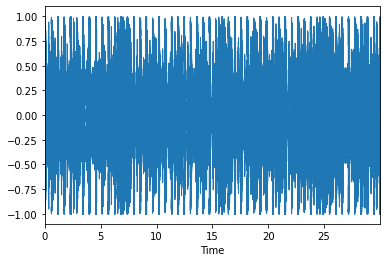

In [551]:
#Mel-Frequency Cepstral Coefficients
x, fs = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)

In [552]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print( mfccs.shape)


#mfcc1 = [223 w5353 35 45 464 ....]

(20, 1293)


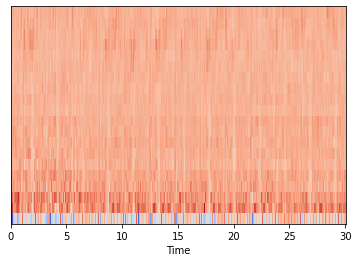

In [553]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [554]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.7701611e-08
 -5.9005369e-09  5.9005369e-09 -5.9005369e-09  0.0000000e+00
 -7.3756712e-10  0.0000000e+00  5.9005369e-09  0.0000000e+00
  0.0000000e+00 -4.4254027e-09 -5.9005369e-09 -5.9005369e-09
 -1.1801074e-08  0.0000000e+00 -1.1801074e-08  8.8508054e-09]
[0.9999999 1.        1.        1.        1.        1.0000002 1.
 1.        0.9999999 1.0000002 1.        0.9999999 1.        1.
 1.        1.        1.        1.        1.0000001 1.0000001]


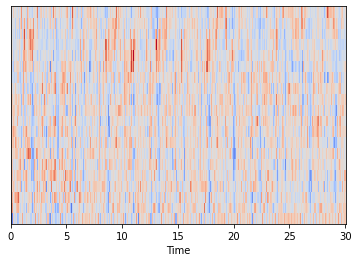

In [555]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

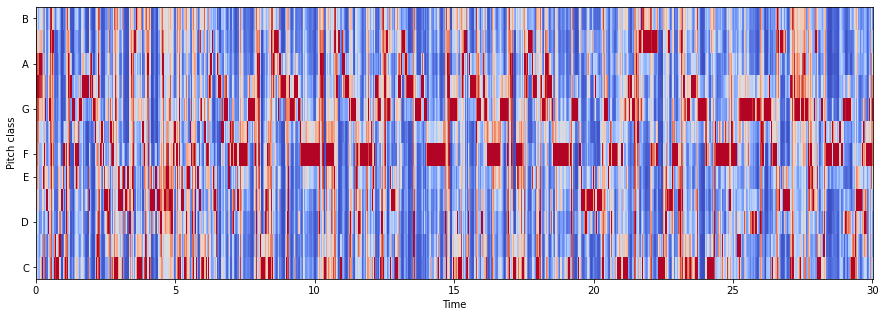

In [556]:
#Chroma Frequencies
# Loadign the file
x, sr = librosa.load(audio_path)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [557]:
#all of the above are the ways we tried to 
#read and visualise the a given audio file

#then we have also tried extracting the spectrogram for every audio,
#and then extracting features from those spectrograms

In [558]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [559]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
#     create a folder of that genre
    pathlib.Path(f'audio_images/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./music_data_set/Data/genres_original/{g}'):
#         access the song
        songname = f'./music_data_set/Data/genres_original/{g}/{filename}'
#     plotting the graph
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
#         saving the graph the folder of the genre in imgae format
        plt.savefig(f'audio_images/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

In [560]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [562]:
#writing the data to csv file in case the .csv file is not there with the dataset
file = open('music_genres.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./music_data_set/Data/genres_original/{g}'):
#         access each song
        songname = f'./music_data_set/Data/genres_original/{g}/{filename}'
#     extract its features
        y, sr = librosa.load(songname, mono=True, duration=30)
#     1 d array
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        rmse = librosa.feature.rms(y=y)
#         2d array
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('music_genres.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [563]:

data = pd.read_csv('./music_data_set/Data/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [564]:
data.shape

(1000, 60)

In [565]:
data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

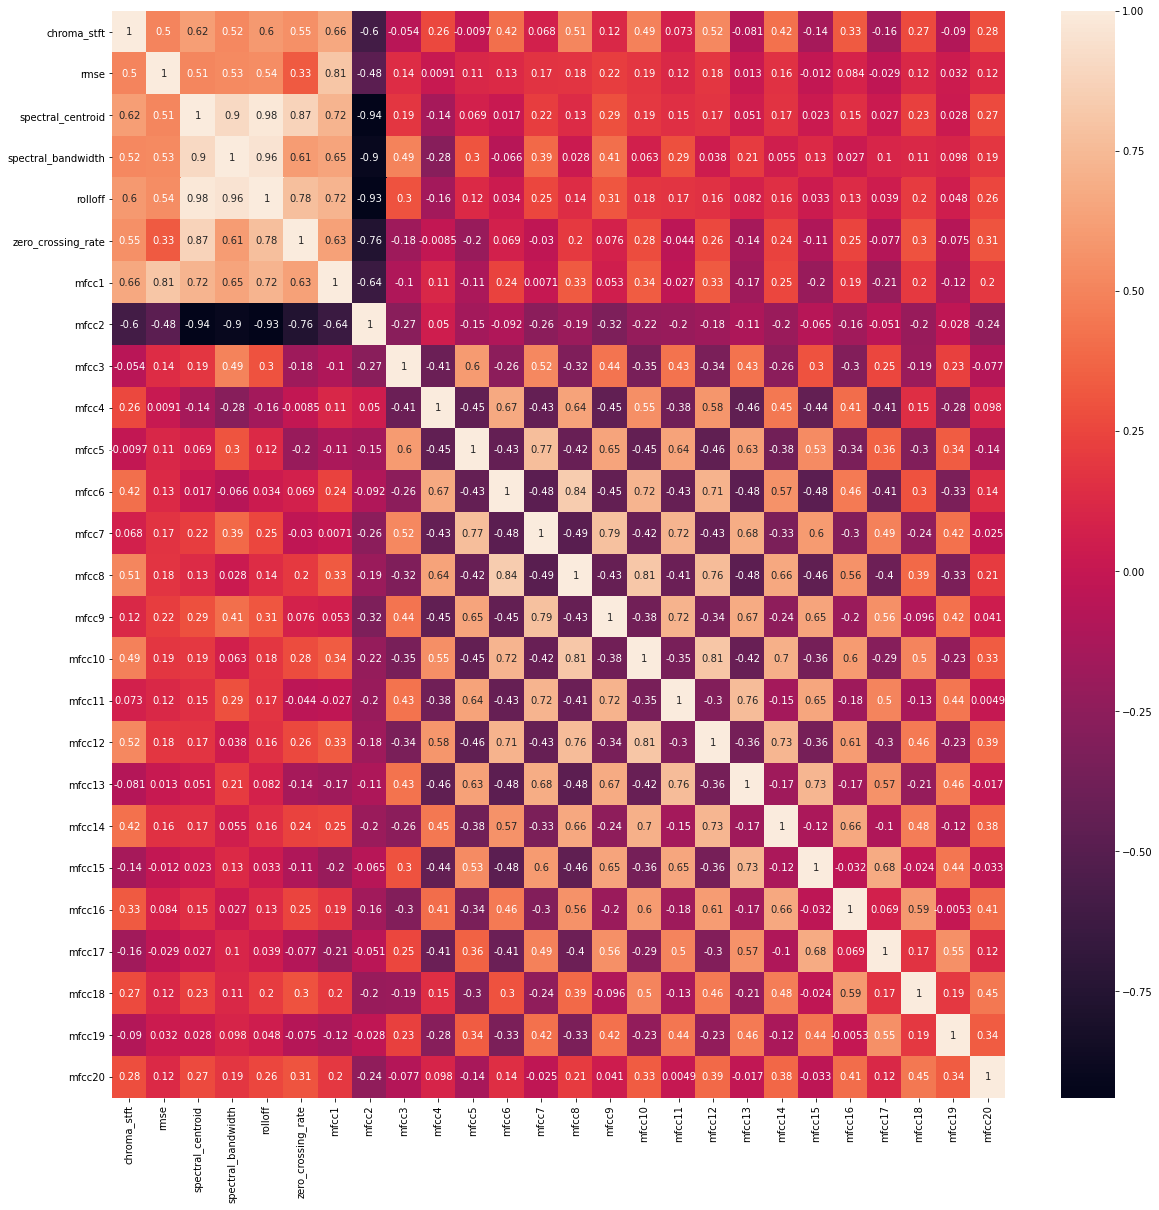

In [771]:
import seaborn as sb

features = pd.read_csv('music_genres.csv')

cor = features.corr()
plt.figure(figsize=(20,20))
sb.heatmap(cor,annot=True)
plt.savefig(f'correlation.png')

In [566]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [567]:
genre_list

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [568]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [569]:
def Repeat(x): 
    _size = len(x) 
    repeated = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated 
  

print (Repeat(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [570]:
data = data.drop(['filename'],axis=1)

In [571]:
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [657]:
X = data.iloc[: , :-1]
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [658]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [659]:
X_train.shape

(750, 58)

In [660]:
y_train

array([8, 0, 5, 5, 3, 1, 3, 3, 9, 9, 6, 7, 3, 7, 0, 4, 5, 4, 2, 0, 8, 8,
       1, 3, 0, 5, 7, 3, 3, 5, 4, 9, 6, 6, 4, 2, 2, 7, 5, 8, 6, 2, 7, 4,
       4, 8, 2, 6, 1, 5, 0, 7, 1, 3, 2, 7, 4, 6, 7, 6, 3, 7, 2, 3, 4, 4,
       2, 2, 8, 9, 6, 8, 2, 1, 3, 2, 8, 0, 7, 7, 8, 9, 5, 8, 6, 3, 8, 8,
       9, 4, 3, 1, 1, 4, 6, 6, 5, 4, 1, 9, 1, 0, 3, 6, 5, 5, 6, 4, 0, 9,
       9, 5, 1, 4, 0, 0, 7, 8, 1, 6, 3, 8, 7, 3, 0, 4, 0, 7, 4, 7, 8, 5,
       1, 7, 9, 5, 0, 8, 5, 5, 8, 8, 3, 5, 5, 1, 8, 1, 0, 6, 7, 9, 2, 4,
       0, 0, 2, 9, 7, 4, 9, 1, 7, 3, 5, 0, 8, 1, 0, 1, 1, 9, 7, 8, 4, 2,
       6, 7, 6, 3, 5, 3, 2, 9, 8, 7, 4, 3, 4, 2, 9, 0, 7, 8, 9, 5, 5, 8,
       4, 9, 6, 5, 1, 0, 2, 6, 5, 4, 2, 0, 9, 8, 6, 1, 8, 5, 6, 1, 6, 9,
       8, 4, 7, 6, 6, 4, 6, 0, 1, 1, 5, 8, 7, 2, 2, 5, 7, 9, 2, 1, 3, 0,
       8, 2, 0, 6, 2, 8, 6, 8, 0, 1, 5, 5, 5, 4, 2, 2, 0, 8, 7, 8, 2, 8,
       6, 9, 3, 4, 0, 4, 6, 8, 9, 2, 5, 5, 6, 9, 1, 0, 7, 1, 7, 7, 8, 7,
       3, 4, 3, 4, 1, 9, 5, 7, 4, 0, 2, 1, 6, 6, 6,

In [661]:
X_test.shape

(250, 58)

In [662]:
y_test

array([5, 7, 8, 6, 1, 6, 7, 1, 3, 6, 3, 7, 5, 0, 2, 4, 2, 0, 6, 2, 2, 1,
       0, 3, 1, 3, 8, 0, 0, 0, 1, 0, 1, 5, 2, 6, 8, 6, 4, 7, 0, 8, 3, 5,
       4, 6, 5, 8, 3, 1, 9, 1, 1, 8, 7, 5, 8, 0, 5, 1, 1, 3, 0, 5, 0, 6,
       1, 6, 8, 3, 7, 3, 9, 3, 0, 4, 6, 9, 9, 9, 1, 5, 5, 8, 5, 8, 4, 5,
       5, 4, 7, 1, 6, 7, 7, 0, 1, 8, 4, 2, 7, 8, 6, 5, 5, 3, 6, 9, 8, 5,
       9, 6, 6, 7, 2, 4, 4, 3, 6, 5, 0, 5, 2, 4, 2, 5, 4, 6, 7, 7, 4, 4,
       2, 2, 0, 6, 3, 4, 8, 0, 7, 4, 1, 9, 6, 9, 5, 4, 6, 1, 4, 4, 9, 3,
       5, 4, 5, 4, 8, 5, 1, 2, 5, 4, 3, 8, 3, 1, 4, 5, 7, 4, 2, 9, 6, 7,
       0, 5, 5, 7, 0, 9, 7, 2, 6, 1, 2, 0, 2, 6, 1, 3, 8, 0, 8, 7, 3, 4,
       3, 8, 8, 1, 9, 4, 0, 9, 6, 3, 0, 1, 9, 4, 6, 3, 3, 0, 2, 4, 2, 4,
       4, 0, 3, 2, 4, 4, 7, 4, 6, 1, 8, 7, 4, 4, 1, 0, 9, 4, 2, 0, 1, 9,
       6, 0, 2, 8, 8, 3, 3, 4])

In [663]:
#cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=2)
kf

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logscore = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X,y,cv=10)

svmscore = cross_val_score(SVC(gamma='auto'),X,y,cv=10)

rfscore = cross_val_score(RandomForestClassifier(n_estimators=40),X,y,cv=10)

In [664]:
np.mean(logscore)

0.49800000000000005

In [665]:
np.mean(svmscore)

0.11900000000000002

In [666]:
np.mean(rfscore)

0.688

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [668]:
def report(matrix):
    print(matrix)
    correct = 0
    wrong = 0
    r , c = matrix.shape
    for i in range(r):
        for j in range(c):
            if i == j:
                correct += matrix[i][j]
            else:
                wrong += matrix[i][j]
    print("Correct predictions: " , correct , "\nWrong prodictions: " , wrong)

In [708]:
#logisticRegression

from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
# 


0.716

In [670]:
y_pred_log = lr.predict(X_test)

In [671]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_log)*100

62.4

In [672]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_log))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        28
           1       0.90      1.00      0.95        19
           2       0.60      0.60      0.60        25
           3       0.38      0.42      0.40        24
           4       0.73      0.37      0.49        30
           5       0.84      0.70      0.76        30
           6       0.67      0.81      0.73        27
           7       0.57      0.76      0.65        21
           8       0.54      0.59      0.57        22
           9       0.41      0.38      0.39        24

    accuracy                           0.62       250
   macro avg       0.63      0.63      0.62       250
weighted avg       0.63      0.62      0.62       250



In [673]:
from sklearn.metrics import confusion_matrix
matrix_log = confusion_matrix(y_test , y_pred_log)
report(matrix_log)

[[20  0  2  1  0  2  3  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 3  0 15  2  0  2  0  1  0  2]
 [ 1  0  1 10  2  0  3  1  1  5]
 [ 0  0  1  4 11  0  2  5  6  1]
 [ 3  2  1  0  0 21  0  2  0  1]
 [ 1  0  0  1  0  0 22  0  0  3]
 [ 0  0  1  3  0  0  0 16  1  0]
 [ 2  0  2  1  2  0  0  1 13  1]
 [ 1  0  2  4  0  0  3  2  3  9]]
Correct predictions:  156 
Wrong prodictions:  94


Text(69.0, 0.5, 'Truth')

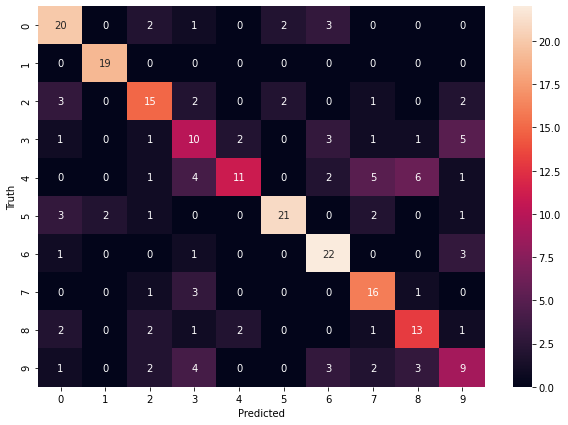

In [674]:
import seaborn as sns
plt.figure(figsize=(10 , 7))
sns.heatmap(matrix_log , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [675]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#svm

from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.764

In [676]:
y_pred_svm = svm.predict(X_test)

In [677]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_svm)*100

76.4

In [678]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.81      0.69        21
           1       0.96      0.86      0.91        28
           2       0.77      0.63      0.69        27
           3       0.60      0.65      0.63        23
           4       0.77      0.68      0.72        25
           5       0.81      0.88      0.85        25
           6       0.87      0.77      0.82        26
           7       0.83      0.95      0.89        21
           8       0.77      0.91      0.83        22
           9       0.68      0.59      0.63        32

    accuracy                           0.76       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.76      0.76       250



In [679]:
y_test.shape

(250,)

In [680]:
from sklearn.metrics import confusion_matrix
matrix_svm = confusion_matrix(y_test , y_pred_svm)
report(matrix_svm)

[[17  0  1  1  0  0  0  0  0  2]
 [ 0 24  0  0  0  4  0  0  0  0]
 [ 4  0 17  1  0  1  0  0  1  3]
 [ 1  0  0 15  4  0  1  1  1  0]
 [ 3  0  0  1 17  0  0  1  3  0]
 [ 1  1  0  0  0 22  0  1  0  0]
 [ 1  0  0  1  0  0 20  0  0  4]
 [ 0  0  0  0  0  0  0 20  1  0]
 [ 0  0  0  0  1  0  0  1 20  0]
 [ 1  0  4  6  0  0  2  0  0 19]]
Correct predictions:  191 
Wrong prodictions:  59


Text(69.0, 0.5, 'Truth')

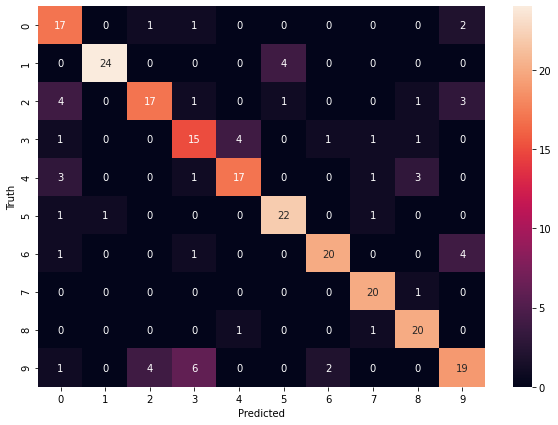

In [681]:
import seaborn as sns
plt.figure(figsize=(10 , 7))
sns.heatmap(matrix_svm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#randomForest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40)

In [683]:
rf.fit(X_train , y_train)
y_pred_rf = rf.predict(X_test)

In [684]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_rf)*100

73.6

In [685]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.96      0.96      0.96        25
           2       0.61      0.55      0.58        20
           3       0.72      0.88      0.79        24
           4       0.77      0.65      0.71        26
           5       0.71      0.79      0.75        19
           6       0.77      0.89      0.83        27
           7       0.86      0.83      0.84        29
           8       0.59      0.76      0.67        25
           9       0.64      0.52      0.57        27

    accuracy                           0.74       250
   macro avg       0.73      0.74      0.73       250
weighted avg       0.74      0.74      0.73       250



In [686]:
matrix_rf = confusion_matrix(y_test , y_pred_rf)
report(matrix_rf)

[[15  0  4  0  1  0  3  0  1  4]
 [ 0 24  0  0  0  1  0  0  0  0]
 [ 1  0 11  2  1  1  0  0  2  2]
 [ 0  0  1 21  0  0  1  0  1  0]
 [ 0  0  0  1 17  0  2  0  4  2]
 [ 3  1  0  0  0 15  0  0  0  0]
 [ 0  0  0  1  1  0 24  0  1  0]
 [ 0  0  0  0  0  0  1 24  4  0]
 [ 0  0  1  0  1  1  0  3 19  0]
 [ 3  0  1  4  1  3  0  1  0 14]]
Correct predictions:  184 
Wrong prodictions:  66


Text(69.0, 0.5, 'Truth')

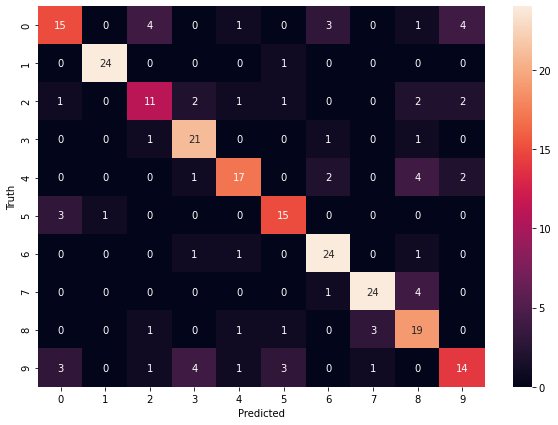

In [687]:
plt.figure(figsize=(10 , 7))
sns.heatmap(matrix_rf , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#trying to predict some unknown data using 

In [742]:
header = 'filename length chroma_stft_mean chroma_stft_var rmse_mean rmse_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean perceptr_var tempo'
for i in range(1, 21):
    header += f' mfcc{i}_mean'
    header += f' mfcc{i}_var'
header = header.split()

In [743]:
#writing the data to csv file in case the .csv file is not there with the dataset
file = open('pred_genres.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

for filename in os.listdir(f'./music_data_set/Test/'):
#         access each song
    songname = f'./music_data_set/Test/{filename}'
    print(songname , '...')
#     extract its features
    y, sr = librosa.load(songname, mono=True, duration=30)
    print(sr)
#     1 d array
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    rmse = librosa.feature.rms(y=y)
    harmny , percussive = librosa.effects.hpss(y)
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, aggregate=None)
#         2d array
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {sr} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(harmny)} {np.var(harmny)} {np.mean(percussive)} {np.var(percussive)} {np.mean(dtempo)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
        to_append += f' {np.var(e)}'
    file = open('pred_genres.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

./music_data_set/Test/unknown8.wav ...
22050
./music_data_set/Test/unknown1.wav ...
22050
./music_data_set/Test/unknown2.wav ...
22050
./music_data_set/Test/test.wav ...
22050
./music_data_set/Test/unknown9.wav ...
22050
./music_data_set/Test/unknown10.wav ...
22050
./music_data_set/Test/test10.wav ...
22050
./music_data_set/Test/unknown7.wav ...
22050
./music_data_set/Test/unknown5.wav ...
22050
./music_data_set/Test/unknown6.wav ...
22050
./music_data_set/Test/test9.wav ...
22050
./music_data_set/Test/test4.wav ...
22050
./music_data_set/Test/test6.wav ...
22050
./music_data_set/Test/test8.wav ...
22050
./music_data_set/Test/test3.wav ...
22050
./music_data_set/Test/unknown3.wav ...
22050
./music_data_set/Test/unknown4.wav ...
22050
./music_data_set/Test/test5.wav ...
22050
./music_data_set/Test/test7.wav ...
22050
./music_data_set/Test/test2.wav ...
22050
./music_data_set/Test/unknown11.wav ...
22050


In [744]:
testData = pd.read_csv('pred_genres.csv')
testData

,filename,length,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,unknown8.wav,22050,0.318100,0.089538,0.302689,0.008311,1751.580594,2.999045e+05,1919.190481,72478.219187,...,-9.441095,57.439037,2.761345,71.719887,-7.429337,68.602051,1.349219,69.225952,-6.837596,69.387871
1,unknown1.wav,22050,0.228079,0.088686,0.063890,0.001823,1234.722974,5.784277e+05,1194.424499,188601.954859,...,-3.733475,75.394302,-11.031929,114.516235,-7.898335,143.907028,-4.896049,116.031487,-2.881830,161.439346
2,unknown2.wav,22050,0.227799,0.088507,0.063890,0.001823,1234.184373,5.743739e+05,1194.517752,187977.824244,...,-3.728089,75.418480,-11.035664,114.455078,-7.897696,143.884888,-4.893983,116.070961,-2.884677,161.448715
3,test.wav,22050,0.297211,0.097254,0.146175,0.001546,2307.323592,5.510925e+05,2618.042083,100284.072460,...,-0.670744,37.445274,-4.839207,35.830261,-0.279194,40.684208,-5.387187,43.812595,-1.933962,61.346405
4,unknown9.wav,22050,0.378351,0.098934,0.250837,0.016760,1455.323795,6.699105e+05,1510.891377,116323.513288,...,-1.729341,99.432510,5.917850,127.365898,0.731428,122.954292,3.296153,110.731590,-5.461357,57.156967
5,unknown10.wav,22050,0.375544,0.086599,0.229384,0.005396,1605.648675,1.620057e+05,1817.069402,37760.680438,...,-10.796299,59.029572,8.562760,72.813347,-5.730560,52.477497,3.653220,33.842083,-4.655032,38.821587
6,test10.wav,22050,0.362349,0.091509,0.083888,0.001211,1398.672358,2.405073e+05,1818.148469,109057.729284,...,-2.816289,46.337250,-4.416438,43.617645,1.558265,34.352123,-5.043121,47.261589,-3.585596,41.294331
7,unknown7.wav,22050,0.387197,0.086476,0.139548,0.011220,2093.958258,4.754817e+05,1626.218313,100214.476889,...,-2.964476,133.351273,-1.082476,65.020309,-7.725557,79.786545,0.348943,81.188499,-4.401442,53.118214
8,unknown5.wav,22050,0.301493,0.090378,0.098095,0.002718,1287.682064,1.496664e+06,1127.332329,224438.666864,...,-1.208220,111.223320,-0.585641,62.095688,-1.935309,76.481697,0.981313,85.643143,0.188780,59.544815
9,unknown6.wav,22050,0.299526,0.088340,0.153939,0.010159,1308.291437,3.812673e+05,1353.940589,200922.323912,...,-14.708585,67.546463,-5.383782,90.605751,-5.294864,47.004955,-8.986910,72.501778,-9.332129,45.440578


In [745]:
testData.shape

(21, 59)

In [750]:
x = sc.fit_transform(testData.drop(['filename'] , axis = 1))

In [747]:
x

array([[ 0.        , -0.57632308,  0.31497692, ...,  0.04288645,
        -1.33823829,  0.25277174],
       [ 0.        , -1.48085004,  0.23789732, ...,  1.5822047 ,
        -0.23976075,  2.8044836 ],
       [ 0.        , -1.48367104,  0.22176369, ...,  1.58350292,
        -0.24055113,  2.80474331],
       ...,
       [ 0.        , -0.11720137, -0.30537919, ..., -0.98731007,
        -0.14588893, -0.79432195],
       [ 0.        ,  2.61998422, -3.75243767, ..., -1.61329139,
         1.61745628, -1.16617778],
       [ 0.        ,  1.52800282, -1.02329469, ..., -0.6540303 ,
        -0.43516834, -0.79979612]])

In [759]:
y_log = lr.predict(x)
y_log

array([0, 7, 7, 2, 0, 5, 2, 8, 7, 2, 8, 3, 4, 7, 1, 7, 9, 3, 5, 6, 4])

In [760]:
songNames = testData['filename'].array
songNames

<PandasArray>
[ 'unknown8.wav',  'unknown1.wav',  'unknown2.wav',      'test.wav',
  'unknown9.wav', 'unknown10.wav',    'test10.wav',  'unknown7.wav',
  'unknown5.wav',  'unknown6.wav',     'test9.wav',     'test4.wav',
     'test6.wav',     'test8.wav',     'test3.wav',  'unknown3.wav',
  'unknown4.wav',     'test5.wav',     'test7.wav',     'test2.wav',
 'unknown11.wav']
Length: 21, dtype: object

In [761]:
def predResults(names , pred):
    for i in range(y_log.size):
        if pred[i] == 0:
            print(names[i] , "\t: Blues")
        elif pred[i] == 1:
            print(names[i] , "\t: Classical")
        elif pred[i] == 2:
            print(names[i] , "\t: Country")
        elif pred[i] == 3:
            print(names[i] , "\t: Disco")
        elif pred[i] == 4:
            print(names[i] , "\t: HipHop")
        elif pred[i] == 5:
            print(names[i] , "\t: Jazz")
        elif pred[i] == 6:
            print(names[i] , "\t: Metal")
        elif pred[i] == 7:
            print(names[i] , "\t: Pop")
        elif pred[i] == 8:
            print(names[i] , "\t: Reggae")
        else:
            print(names[i] , "\t: Rock")

In [762]:
predResults(songNames , y_log)

unknown8.wav 	: Blues
unknown1.wav 	: Pop
unknown2.wav 	: Pop
test.wav 	: Country
unknown9.wav 	: Blues
unknown10.wav 	: Jazz
test10.wav 	: Country
unknown7.wav 	: Reggae
unknown5.wav 	: Pop
unknown6.wav 	: Country
test9.wav 	: Reggae
test4.wav 	: Disco
test6.wav 	: HipHop
test8.wav 	: Pop
test3.wav 	: Classical
unknown3.wav 	: Pop
unknown4.wav 	: Rock
test5.wav 	: Disco
test7.wav 	: Jazz
test2.wav 	: Metal
unknown11.wav 	: HipHop


In [763]:
y_svm = svm.predict(x)

predResults(songNames , y_svm)

unknown8.wav 	: Blues
unknown1.wav 	: Blues
unknown2.wav 	: Blues
test.wav 	: Jazz
unknown9.wav 	: Blues
unknown10.wav 	: Jazz
test10.wav 	: Rock
unknown7.wav 	: Reggae
unknown5.wav 	: Country
unknown6.wav 	: Country
test9.wav 	: Reggae
test4.wav 	: Disco
test6.wav 	: HipHop
test8.wav 	: Pop
test3.wav 	: Classical
unknown3.wav 	: Pop
unknown4.wav 	: HipHop
test5.wav 	: Disco
test7.wav 	: Jazz
test2.wav 	: Metal
unknown11.wav 	: HipHop


In [764]:
y_rf = rf.predict(x)

predResults(songNames , y_rf)

unknown8.wav 	: Blues
unknown1.wav 	: Classical
unknown2.wav 	: Classical
test.wav 	: Jazz
unknown9.wav 	: HipHop
unknown10.wav 	: Rock
test10.wav 	: Jazz
unknown7.wav 	: Disco
unknown5.wav 	: Country
unknown6.wav 	: Country
test9.wav 	: Jazz
test4.wav 	: Metal
test6.wav 	: HipHop
test8.wav 	: HipHop
test3.wav 	: Classical
unknown3.wav 	: Country
unknown4.wav 	: Rock
test5.wav 	: Rock
test7.wav 	: Jazz
test2.wav 	: Metal
unknown11.wav 	: HipHop
